# Technical Report- ADC Lab Part 1 Jessica Allen 10/31

## Methods/Data Collection

Using DC power supply and oscilloscope we seek to verify and ensure the accuracy of three primary quantities: the 10% duty cycle, the 5s timer, and the linear mapping.  We will do so using traditional statistical methods such as calculating the 95% confidence interval in addition to a linear regression (to verify successful linear mapping). In order to make these calculations, a data table was created using the gathered data generated by the oscilloscope to obtain off time (ms), on time (ms) and the total period (ms) of blinking. Next, the DC power supply was used to place a different voltages into the AIN0 channel to generate various blinking frequencies of the LED. Note that we had to take into account the bounds of the linear mapping: (0V, 3V) and (1Hz, 5Hz), so 0.0V, 1.0V, 2.0V, and 3.0V charges were applied to the Nordic Development Kit and the associated blinking rates were measured using the oscilloscope. This data (both the on time and off time specfically) can be used to determine the accuracy of the 10% duty cycle.

As for determining the accuracy of the timer, logging statements were placed into each of the timers to determine the start and end times (using k_uptime_get()). The elapsed time was calculated and logged, and these values were entered into a table.

## Results

Loading in the generated .csv file. Note that 4 samples were taken for each voltage.

In [33]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the data

logging_data = pd.read_csv('ADC_voltage_Part1.csv')

logging_data.head(20)


,Volts,mv,on time (ms),off time (ms),total period (ms),actual on time (ms),actual off (time),actual total period (ms)
0,0,0,100,900,1000,100.0,900.0,1000.0
1,0,0,100,900,1000,100.0,900.0,1000.0
2,0,0,100,900,1000,100.0,900.0,1000.0
3,0,0,99,897,996,100.0,900.0,1000.0
4,1,999,42,385,427,42.9,386.3,429.2
5,1,999,42,385,427,42.9,386.3,429.2
6,1,997,42,386,428,42.9,386.3,429.2
7,1,999,42,385,427,42.9,386.3,429.2
8,2,2001,27,245,272,27.3,245.4,272.7
9,2,2002,27,245,272,27.3,245.4,272.7


## Data analysis for duty cycle and 5s ontime accuracy

Deriving basic statistics for the LED blinking on and off times (mean, std, min, etc.)

In [5]:
logging_data.groupby('actual on time (ms)')['on time (ms)'].describe()

,count,mean,std,min,25%,50%,75%,max
actual on time (ms),,,,,,,,
20.0,4.0,20.00,0.0,20.0,20.00,20.0,20.0,20.0
27.3,4.0,27.00,0.0,27.0,27.00,27.0,27.0,27.0
42.9,4.0,42.00,0.0,42.0,42.00,42.0,42.0,42.0
100.0,4.0,99.75,0.5,99.0,99.75,100.0,100.0,100.0


In [30]:
logging_data.groupby('actual off (time)')['off time (ms)'].describe()

,count,mean,std,min,25%,50%,75%,max
actual off (time),,,,,,,,
180.0,4.0,180.00,0.0,180.0,180.00,180.0,180.00,180.0
245.4,4.0,245.00,0.0,245.0,245.00,245.0,245.00,245.0
386.3,4.0,385.25,0.5,385.0,385.00,385.0,385.25,386.0
900.0,4.0,899.25,1.5,897.0,899.25,900.0,900.00,900.0


Now we will load in our data generated by the logging statements to ensure the 5s timing is accurate. 10 data points were recorded:

In [31]:
#loading in 5s data
five_s_data = pd.read_csv('ADC_timer_Part1.csv')
five_s_data.head(20)

,5s timer actual (ms),5s timer measured (ms)
0,5000,5000
1,5000,5000
2,5000,5000
3,5000,5000
4,5000,5000
5,5000,5000
6,5000,5000
7,5000,5000
8,5000,5000
9,5000,5000


In [32]:
#generating basic stats
five_s_data.groupby('5s timer actual (ms)')['5s timer measured (ms)'].describe()

,count,mean,std,min,25%,50%,75%,max
5s timer actual (ms),,,,,,,,
5000,10.0,5000.0,0.0,5000.0,5000.0,5000.0,5000.0,5000.0


### How to Calculate 95% Confidence Interval for a Mean
To quantify the accuracy of both the 10% duty cycle (on and off times) and 5s ontime data we must calculate the 95% confidence interval for both below:

In [9]:
# calculate the 95% confidence intervals
confidence_interval = logging_data.groupby('actual on time (ms)')['on time (ms)'].apply(
    lambda x: sp.stats.t.interval(0.95, len(x)-1, loc=np.mean(x), scale=sp.stats.sem(x))
)
print(confidence_interval)

actual on time (ms)
20.0                                  (nan, nan)
27.3                                  (nan, nan)
42.9                                  (nan, nan)
100.0    (98.95438842367894, 100.54561157632106)
Name: on time (ms), dtype: object


/Users/jea8802/anaconda3/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/Users/jea8802/anaconda3/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [10]:
# calculate the 95% confidence intervals
confidence_interval = logging_data.groupby('actual off (time)')['off time (ms)'].apply(
    lambda x: sp.stats.t.interval(0.95, len(x)-1, loc=np.mean(x), scale=sp.stats.sem(x))
)
print(confidence_interval)

actual off (time)
180.0                                  (nan, nan)
245.4                                  (nan, nan)
386.3    (384.45438842367895, 386.04561157632105)
900.0      (896.8631652710368, 901.6368347289632)
Name: off time (ms), dtype: object


/Users/jea8802/anaconda3/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/Users/jea8802/anaconda3/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


Since we were not able to make a confidence interval for our 5s timer (due to lack of variation) we will make a boxplot to show accuracy

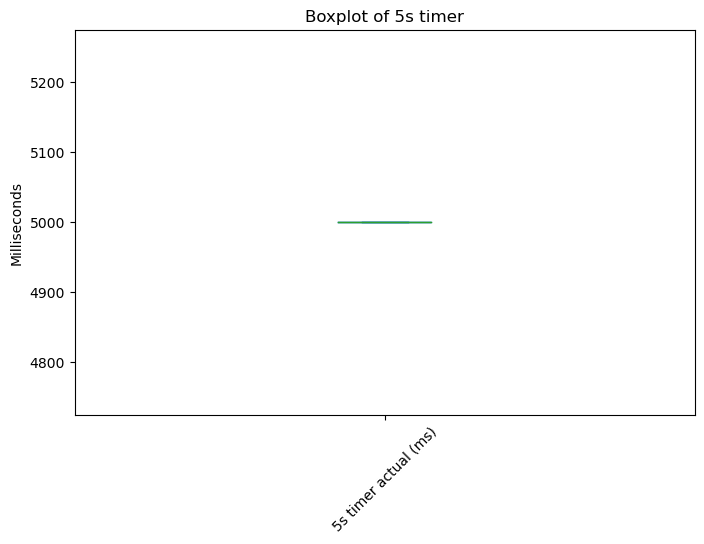

In [21]:
#for 5s
columns_to_plot_5s = [
    '5s timer actual (ms)'
]

five_s_data[columns_to_plot_5s].plot(kind='box', figsize=(8, 5))
plt.title('Boxplot of 5s timer')
plt.ylabel('Milliseconds')
plt.xticks(rotation=45)
plt.show()

## Conclusions for Duty Cycle and Ontime

Given the little to no variation shown by the 95% confidence interval for both the on and off times compared to the actual values, it can be seen that the 10% duty cycle is accurate. There is slight variation for the 1Hz blink rate (for both the on and off times) and 2.33 Hz  blink rate off time (386.3ms), but it is almost negligible. This could be due to slight noise or residual charge in the board. Since the on and off values were compared to the actual values (calculated using the equation $y = \frac{4}{3}x +1$), it can be concluded that the 10% duty cycle is maintained when providing 0.0V, 1.0V, 2.0V, and 3.0V given the minimal variation.

On the other hand, using the logging statements, it can be noted that the 5s timer is very accurate and there is no variation, given the 10 samples tested. Thus, it can be concluded the priority of the tasks is sound, as there is no delay detected. 

## Linear Regression for AIN0 and Blink Frequency
Now we will be performing a linear regression to determine behavior of blink frequency vs the amount of voltage applied to the AIN0 channel. Note that we will be using 1.0, 2.0, and 3.0V as reference points. Note that this data table was created by taking the averages of each of the 4 sample points for each voltage found in the first table. The blink rate was determined by inserting the 'AIN0 Volts' value into the linear mapping function $y= \frac{4}{3}x + 1$.

In [24]:
#let's read in our data
file_path = 'ADC_regression_Part1.csv'
data = pd.read_csv(file_path)
data.head(20)

,AIN0 Volts (V),on time (ms),blink rate (Hz)
0,0,99.75,1.00
1,1,42.00,2.33
2,2,27.00,3.67
3,3,20.00,5.00


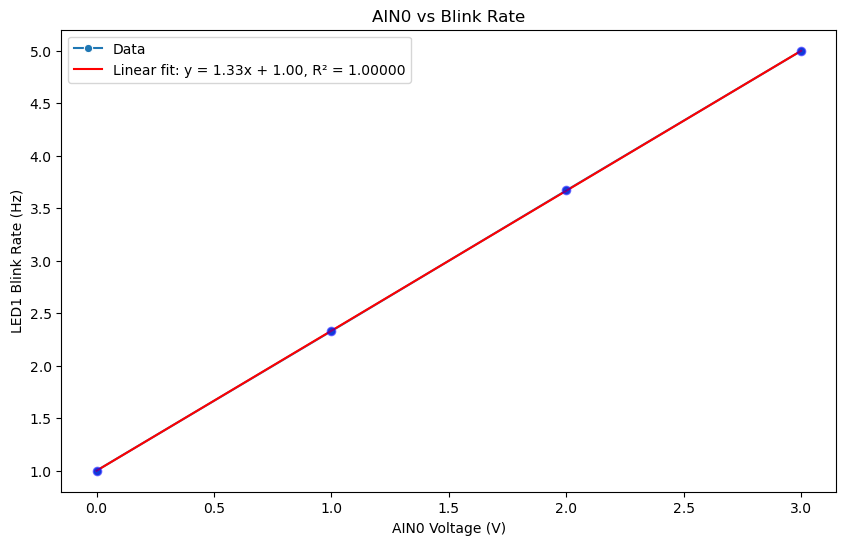

In [28]:
#now performing linear regression
from bme554 import plot_with_fit

file_path = 'ADC_regression_Part1.csv'
data = pd.read_csv(file_path)

# Plotting for AIN0 vs Blink Rate
plot_with_fit(data['AIN0 Volts (V)'], data['blink rate (Hz)'], 'AIN0 Voltage (V)', 'LED1 Blink Rate (Hz)', 'AIN0 vs Blink Rate')


In [29]:
#calculating confidence intervals
from bme554 import calculate_confidence_intervals

# Calculate and print confidence intervals for AIN0 vs Blink Rate
slope_ci, intercept_ci = calculate_confidence_intervals(data['AIN0 Volts (V)'], data['blink rate (Hz)'])
print(f'AIN0 vs Blink Rate:\nSlope CI: [{slope_ci[0]:.4f} - {slope_ci[1]:.4f}]\nIntercept CI: [{intercept_ci[0]:.4f} - {intercept_ci[1]:.4f}]\n')


AIN0 vs Blink Rate:
Slope CI: [1.3279 - 1.3401]
Intercept CI: [0.9939 - 1.0041]



## Conclusions for Linear Regression

Given the $R^2 = 1000$ value, it can be seen our data points are perfectly linear with a fit line of $y = 1.33x + 1.00$. This was expected as we are attempting to linearly map $(0V, 1Hz)$ to $(1V, 5Hz)$ and this line is the result of the slope-intercept form of these two points. This ultimately signifies that the structure of the code properly allocates tasks in a proper manner that does not cause any blocking or delay.
